<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-признака-Surname,-идентификатора-строки,-идентификатора-клиента" data-toc-modified-id="Удаление-признака-Surname,-идентификатора-строки,-идентификатора-клиента-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удаление признака Surname, идентификатора строки, идентификатора клиента</a></span></li><li><span><a href="#Применение-демми-признаков-(ohe)" data-toc-modified-id="Применение-демми-признаков-(ohe)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Применение демми-признаков (ohe)</a></span></li><li><span><a href="#Создадим-выборки-и-приведём-объекты-выборок-к-единому-масштабу" data-toc-modified-id="Создадим-выборки-и-приведём-объекты-выборок-к-единому-масштабу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Создадим выборки и приведём объекты выборок к единому масштабу</a></span></li><li><span><a href="#Проанализируем-баланс-классов" data-toc-modified-id="Проанализируем-баланс-классов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проанализируем баланс классов</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Произведём-обучение-модели-RandomForestClassifier" data-toc-modified-id="Произведём-обучение-модели-RandomForestClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Произведём обучение модели RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsample" data-toc-modified-id="Downsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsample</a></span></li><li><span><a href="#Подбор-параметров-модели-по-обновленому-сету-данных" data-toc-modified-id="Подбор-параметров-модели-по-обновленому-сету-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подбор параметров модели по обновленому сету данных</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [182]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import numpy as np
import itertools
import operator
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

Сделаем сразу замену типа у признака Exited на uint8, т.к. данный тип является стандартным для цифровых булевых значений в pandas.

In [183]:
data = pd.read_csv('/datasets/Churn.csv')
data['Exited'] = data['Exited'].astype('uint8')
print(data.shape)
print()
print(data.info())
print()
data.head()

(10000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  uint8  
dtypes: float64(3), int64(7), object(3), uint8(1)
memory usage: 1.0+ MB
None



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Сделаем замену наименований на нижний регистр с раздением нижней чертой, для корректной работы с признаками

In [184]:
new_columns = []
for item in list(data.columns):
    item = item.lower()
    new_columns.append(item)

#', '.join(new_columns)
new_columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',\
               'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']
data.columns = new_columns
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверка на дубли, чтобы не обучить на некорректных данных

In [185]:
data.duplicated().sum()

0

Дубликатов нет, проверим на пропуски

In [186]:
def search_nan(data, parametr=''):
    if parametr == '':
        series_null_list =[]
        series_null = data.isnull().sum().sort_values(ascending=False)
        for i in series_null.index:
            if series_null[i] > 0:
                print('В столбце -', i, '- пропущено:', series_null[i], ';')
                series_null_list.append(i)
        print()
    elif parametr != '':
        if data[parametr].isnull().sum() > 0:
            print('В столбце -', parametr, '- пропущено:', data[parametr].isnull().sum(), ';')
        else:
            print('нет пропусков')
    #return series_null_list
    print()
    

            
def search_none(data):
    problem =[]
    for column in data.columns:
        if data.loc[data[column] == 'None'][column].count() > 0:
            print('None обнаружен в столбце - ', column, '- в количестве', data.loc[data[column] == 'None'][column].count())
            problem.append(column)
    if len(problem) == 0:
        print('None пропусков нет в таблице')

    
search_none(data)
search_nan(data)

None пропусков нет в таблице
В столбце - tenure - пропущено: 909 ;




Сделаем замену на 0, в выводе дам более подробный анализ

In [187]:
data = data.dropna(subset=['tenure'])
search_nan(data)

**Предварительный вывод:**

Заполнение константой признака "tenure" (сколько лет человек является клиентом банка) искажает представление, поэтому удалим пропуски, так как их у нас менее 10%. 

Проблем в данных не обнаружено: дублей и None - нет, а пропуски устранены путем удаления и только в одном признаке.

Имеется 3 категориальных признака: Surname(не нужен, мы не ищем зависимоcти от фамилии), Gender, Geography и один бинарный: Exited. Для дальнешего обучения нужно удалить: признак Surname, т.к. он не несет никакого влияния, идентификатор клиента - customer_id и row_number - индентификатор строки. Признаки: gender, geography - нужно преобразовать в бинарные методологией OHE (one-hot encoding). Как один из вариантов, можно проверить методологию OrdinalEncoding, но в данном проекте воспользуемся только OHE.

Следующим шагом будет разделение выборок и приведение количественных признаков к единому масштабу, чтобы исключить разновесовое влияние.

### Удаление признака Surname, идентификатора строки, идентификатора клиента

In [188]:
data = data.drop(['surname', 'row_number', 'customer_id'], axis=1)

In [189]:
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Применение демми-признаков (ohe)

In [190]:
data_ohe = pd.get_dummies(data, drop_first = True)
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Создадим выборки и приведём объекты выборок к единому масштабу

In [191]:
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.25, random_state=12345)
print('Проверка размера выборок:')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

column_for_scaled = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

X_train_for_scaled = X_train.loc[:,column_for_scaled]
X_test_for_scaled = X_test.loc[:,column_for_scaled]

scaler = StandardScaler()

scaler.fit(X_train_for_scaled)
scaler_train_data = pd.DataFrame(scaler.transform(X_train_for_scaled), columns=column_for_scaled)
scaler_test_data = pd.DataFrame(scaler.transform(X_test_for_scaled), columns=column_for_scaled)

#X_train_sk = pd.DataFrame(scaler.transform(data_ohe), columns=column_for_scaled)
scaler_train_data.head(2)

Проверка размера выборок:
X_train (6818, 11)
X_test (2273, 11)
Y_train (6818,)
Y_test (2273,)


,credit_score,age,tenure,balance,estimated_salary
0,-1.037187,0.375163,-0.681448,0.937205,-1.635163
1,0.297802,-0.096680,-0.681448,-1.233158,-0.590123


In [192]:
diff_column = set(data_ohe.columns)-set(column_for_scaled)
diff_column

{'exited',
 'gender_Male',
 'geography_Germany',
 'geography_Spain',
 'has_cr_card',
 'is_active_member',
 'num_of_products'}

In [193]:
diff_column = ['gender_Male', 'geography_Germany', 'geography_Spain', 'has_cr_card', 'is_active_member', 'num_of_products']
temp_train = X_train.loc[:,diff_column].reset_index(drop=True);
temp_test = X_test.loc[:,diff_column].reset_index(drop=True);

In [194]:
X_train_scaled = pd.concat([scaler_train_data, temp_train], axis=1)
X_test_scaled = pd.concat([scaler_test_data, temp_test], axis=1)
X_train_scaled.head(2)

,credit_score,age,tenure,balance,estimated_salary,gender_Male,geography_Germany,geography_Spain,has_cr_card,is_active_member,num_of_products
0,-1.037187,0.375163,-0.681448,0.937205,-1.635163,0,1,0,1,0,1
1,0.297802,-0.096680,-0.681448,-1.233158,-0.590123,1,0,0,1,0,2


### Проанализируем баланс классов

In [195]:
print('Дисбаланс классов на тренировочной выборке =', round(Y_train[Y_train==0].count()/Y_train[Y_train==1].count(),2))
print('Дисбаланс классов на тренировочной выборке =', round(Y_test[Y_test==0].count()/Y_test[Y_test==1].count(),2))
print('Дисбаланс классов усредненный, округленный до целой части =',\
      round(target[target==0].count()/target[target==1].count(),0))

Дисбаланс классов на тренировочной выборке = 3.86
Дисбаланс классов на тренировочной выборке = 4.04
Дисбаланс классов усредненный, округленный до целой части = 4.0


**Вывод:**

1/5 часть клиентов ушла, в представленном датасете дисбаланс между классами в 4 раза.

## Исследование задачи

In [196]:
X_train_scaled.head()

,credit_score,age,tenure,balance,estimated_salary,gender_Male,geography_Germany,geography_Spain,has_cr_card,is_active_member,num_of_products
0,-1.037187,0.375163,-0.681448,0.937205,-1.635163,0,1,0,1,0,1
1,0.297802,-0.096680,-0.681448,-1.233158,-0.590123,1,0,0,1,0,2
2,-1.078582,-0.191049,1.384103,0.307627,0.073185,1,1,0,0,1,2
3,-1.130326,-1.040366,1.039844,-1.233158,1.674643,1,0,1,0,0,2
4,-0.478354,0.092057,-0.337189,0.420246,-1.069473,1,0,0,1,1,2


In [16]:
print(X_train_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       6818 non-null   float64
 1   age                6818 non-null   float64
 2   tenure             6818 non-null   float64
 3   balance            6818 non-null   float64
 4   estimated_salary   6818 non-null   float64
 5   gender_Male        6818 non-null   uint8  
 6   geography_Germany  6818 non-null   uint8  
 7   geography_Spain    6818 non-null   uint8  
 8   has_cr_card        6818 non-null   int64  
 9   is_active_member   6818 non-null   int64  
 10  num_of_products    6818 non-null   int64  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 446.2 KB
None


### Произведём обучение модели RandomForestClassifier

In [234]:
rfc = RandomForestClassifier(random_state=12345)

In [235]:
#получим доступные параметры модели
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Создадим словарь параметров для подбора идеальных гиперпараметров модели с помощью класса GridSearchCV

In [236]:
param_grid = {'n_estimators': range(1, 50, 2)\
              #,'max_features': ['auto', 'sqrt', 'log2'],\
              ,'max_depth' : range(1, 50, 2),\
              'criterion' : ['gini', 'entropy']\
             }

In [237]:
grid_cv = GridSearchCV(rfc, param_grid, scoring='f1', cv=3)

In [201]:
%%time
grid_cv.fit(X_train_scaled, Y_train)
print('\nbest_params_ \n', grid_cv.best_params_)
print('\nbest_score \n', grid_cv.best_score_)


best_params_ 
 {'criterion': 'gini', 'max_depth': 23, 'n_estimators': 21}

best_score 
 0.5807919065669765
CPU times: user 12min 36s, sys: 3.26 s, total: 12min 39s
Wall time: 12min 41s


CV AUC-ROC scores: [0.84281175 0.84418529 0.84028483 0.79917392 0.83264741]


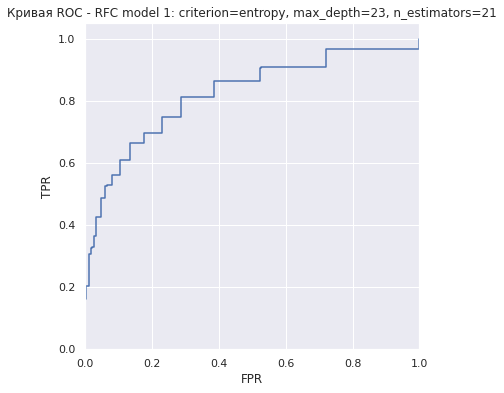

auc_roc = 0.8405975500230005


In [238]:
model_f1 = RandomForestClassifier(criterion='entropy',max_depth=23, max_features='auto', n_estimators = 21, random_state=12345)

cv_scores = cross_val_score(model_f1, X_train_scaled, Y_train, cv=5, scoring='roc_auc')
print(f'CV AUC-ROC scores: {cv_scores}')

model_f1.fit(X_train_scaled, Y_train)

probabilities = model_f1.predict_proba(X_test_scaled)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC - RFC model 1: criterion=entropy, max_depth=23, n_estimators=21')
plt.show()
print('auc_roc =', auc_roc)

In [254]:
def main_param(target, predictions):
    '''
    Функция для расчета основных метрик с использованием кросс-валидации
    '''
    from sklearn.metrics import confusion_matrix, make_scorer, recall_score, precision_score, f1_score
    from sklearn.model_selection import cross_validate
    
    scoring = {'recall': make_scorer(recall_score), 'precision': make_scorer(precision_score), 'f1': make_scorer(f1_score)}
    cv_results = cross_validate(model_f1, X_train, Y_train, cv=5, scoring=scoring)
    recall = cv_results['test_recall'].mean()
    precision = cv_results['test_precision'].mean()
    f1 = cv_results['test_f1'].mean()
    
    print('confusion_matrix\n',confusion_matrix(target, predictions))
    print('recall_score', recall_score(target, predictions))
    print('precision_score', precision_score(target, predictions))
    print('f1_score', f1_score(target, predictions))

In [255]:
predictions = model_f1.predict(X_test_scaled)
print('recall_score', round(recall_score(Y_test, predictions),2))
print('precision_score', round(precision_score(Y_test, predictions),2))
print('f1_score', round(f1_score(Y_test, predictions),2))

result=pd.DataFrame(columns = ['type','criterion', 'max_depth', 'max_features', 'n_estimator', 'recall', 'precision', 'f1'])
result.loc[1] = ['model 1','entropy',21,'auto', 23,round(recall_score(Y_test, predictions),2),round(precision_score(Y_test, predictions),2),round(f1_score(Y_test, predictions),2)]
result

recall_score 0.48
precision_score 0.71
f1_score 0.58


,type,criterion,max_depth,max_features,n_estimator,recall,precision,f1
1,model 1,entropy,21,auto,23,0.48,0.71,0.58


Confusion matrix, without normalization
[[1734   88]
 [ 233  218]]


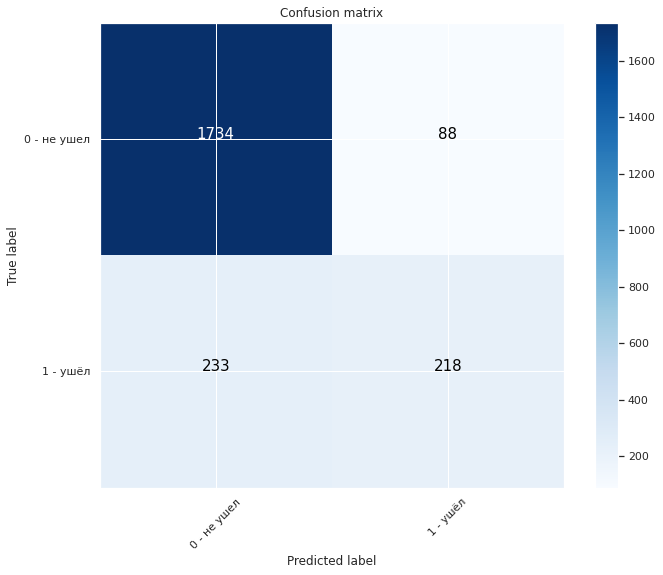

In [256]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

plt.figure(figsize=(10, 8))

cnf_matrix = confusion_matrix(Y_test, predictions);
plot_confusion_matrix(cnf_matrix, classes=['0 - не ушел', '1 - ушёл'],title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

TN - истино-отрицательные ответы = 1734, т.е правильно определённые отрицательные ответы, означающие, что клиент остался; FN - ложно-отрицательные ответы = 233, показывает, что клиент остался, не смотря на то, что он ушёл, т.е. ошибка; TP - истино-положительные ответы = 218, значит, что клиент ушёл; FP - ложно-положительные ответы = 88, ошибка, показывает, что клиент ушел, а он остался.

F1 мера получилась ниже, чем у более ранней модели, что и стоило ожидать. Теперь рассмотрим модель обученную без гиперпараметров.

In [257]:
model_simple = RandomForestClassifier(n_estimators=10, random_state=12345)
model_simple.fit(X_train_scaled, Y_train)
predictions = model_simple.predict(X_test_scaled)
main_param(Y_test, predictions)

confusion_matrix
 [[1741   81]
 [ 256  195]]
recall_score 0.43237250554323725
precision_score 0.7065217391304348
f1_score 0.5364511691884457


CV AUC-ROC scores: [0.8238007  0.81996267 0.83811444 0.76698819 0.80810909]


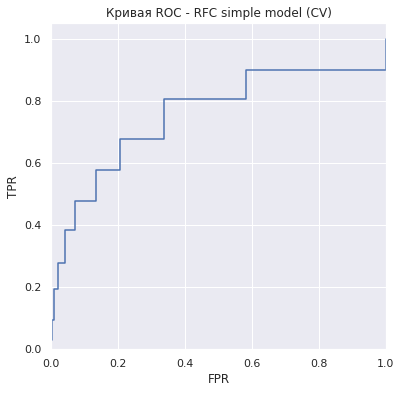

auc_roc = 0.804711325728166


In [258]:
from sklearn.model_selection import cross_val_predict

cv_scores = cross_val_score(model_simple, X_train_scaled, Y_train, cv=5, scoring='roc_auc')
print(f'CV AUC-ROC scores: {cv_scores}')

probabilities = cross_val_predict(model_simple, X_test_scaled, Y_test, cv=5, method='predict_proba')
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC - RFC simple model (CV)')
plt.show()
print('auc_roc =', auc_roc)

In [259]:
model_simple.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}

In [260]:
result.loc[2] = ['model 2: simple model without params','gini',None,'auto', 10,0.43,0.71,0.54]
result

,type,criterion,max_depth,max_features,n_estimator,recall,precision,f1
1,model 1,entropy,21,auto,23,0.48,0.71,0.58
2,model 2: simple model without params,gini,None,auto,10,0.43,0.71,0.54


**Вывод**

Даже без установки гиперпараметров модель показывает сравнимое значение с моделью, по которой был произведен поиск оптимальных параметров с помощью класса GridSearchCV, но не одинаковое, уcтановка гиперпараметров улучшает качество модели. Возможно поможет устранение дисбаланса классов, а он есть в соотношении нулей и единиц 4:1 соотвественно.

confusion_matrix
 [[1764   58]
 [ 360   91]]
recall_score 0.2017738359201774
precision_score 0.610738255033557
f1_score 0.30333333333333334


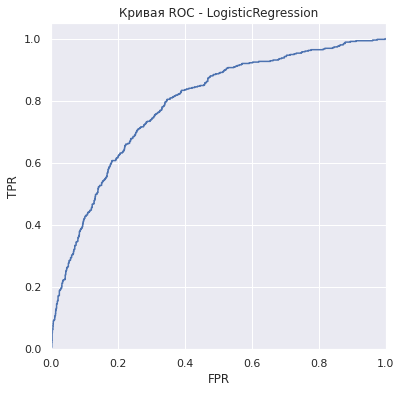

auc_roc = 0.7884832096499791


In [261]:
# Проверим логистическую регрессию
model_logreg = LogisticRegression(random_state=12345, solver='liblinear')
model_logreg.fit(X_train_scaled, Y_train)
predictions = model_logreg.predict(X_test_scaled)
main_param(Y_test, predictions)

probabilities = model_logreg.predict_proba(X_test_scaled)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC - LogisticRegression')
plt.show()
print('auc_roc =', auc_roc)

**Вывод** 

Оба алгоритма - RandomForestClassifier и LogisticRegression - показали хорошие результаты с точки зрения метрик. Однако, значения AUC-ROC в модели RandomForestClassifier выше, что говорит о том, что данная модель лучше справляется с классификацией, чем LogisticRegression. Кроме того, основные параметры модели (точность, полнота, F1-мера) в  RandomForestClassifier была выше, чем в LogisticRegression. В целом, RandomForestClassifier имеет преимущество перед LogisticRegression в данной задаче классификации.

## Борьба с дисбалансом

Воспользуемся параметром class_weight, рассмотрим его влияние:

In [262]:
model_simple = RandomForestClassifier(class_weight='balanced', random_state=12345)
model_simple.fit(X_train_scaled,Y_train)
predictions = model_simple.predict(X_test_scaled)
main_param(Y_test, predictions)

confusion_matrix
 [[1760   62]
 [ 255  196]]
recall_score 0.43458980044345896
precision_score 0.7596899224806202
f1_score 0.5528913963328631


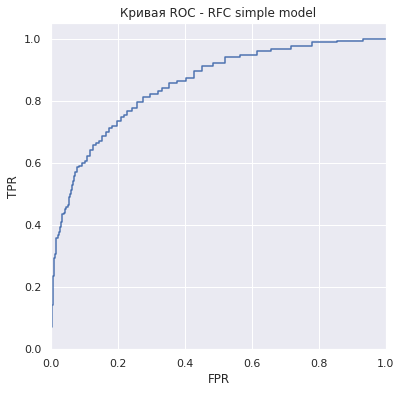

auc_roc = 0.8565408982599954


In [263]:
probabilities = model_simple.predict_proba(X_test_scaled)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC - RFC simple model')
plt.show()
print('auc_roc =', auc_roc)

In [264]:
result['class_weight'] = False
result.loc[3] = ['model 2: simple model without params','gini',None,'auto', 10, 0.43, 0.76, 0.55, True]
result

,type,criterion,max_depth,max_features,n_estimator,recall,precision,f1,class_weight
1,model 1,entropy,21,auto,23,0.48,0.71,0.58,False
2,model 2: simple model without params,gini,None,auto,10,0.43,0.71,0.54,False
3,model 2: simple model without params,gini,None,auto,10,0.43,0.76,0.55,True


Установка параметра модели по взвешиванию не привела к существенному улучшению показателей, воспользуемся уменьшенем и увеличением классов.

### Upsampling

Преобразование проходит в несколько этапов:

- Разделить обучающую выборку на объекты по классам;
- Определить тот класс, который содержит меньше объектов. Назовём его меньшим классом;
- Скопировать несколько раз объекты меньшего класса;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные.

In [265]:
repeat = int(round(Y_train[Y_train==0].count()/Y_train[Y_train==1].count(),0))
repeat

4

In [266]:
print(Y_train.value_counts())
Y_train = Y_train.astype('uint8').reset_index(drop=True)
Y_train

0    5415
1    1403
Name: exited, dtype: int64


0       0
1       0
2       0
3       0
4       0
       ..
6813    0
6814    1
6815    0
6816    1
6817    0
Name: exited, Length: 6818, dtype: uint8

In [267]:
search_none(X_train_scaled)
search_nan(X_train_scaled)
X_train_scaled

None пропусков нет в таблице




,credit_score,age,tenure,balance,estimated_salary,gender_Male,geography_Germany,geography_Spain,has_cr_card,is_active_member,num_of_products
0,-1.037187,0.375163,-0.681448,0.937205,-1.635163,0,1,0,1,0,1
1,0.297802,-0.096680,-0.681448,-1.233158,-0.590123,1,0,0,1,0,2
2,-1.078582,-0.191049,1.384103,0.307627,0.073185,1,1,0,0,1,2
3,-1.130326,-1.040366,1.039844,-1.233158,1.674643,1,0,1,0,0,2
4,-0.478354,0.092057,-0.337189,0.420246,-1.069473,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
6813,1.280934,-0.474154,1.728361,0.808482,-1.104143,1,1,0,0,0,1
6814,0.152920,0.469531,1.039844,1.065897,0.254945,0,0,0,1,1,1
6815,-1.057885,-0.945997,0.351327,0.446252,-1.098318,0,0,0,1,1,1
6816,-0.964746,1.224480,1.384103,-1.233158,1.286788,0,0,0,1,0,1


In [268]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       6818 non-null   float64
 1   age                6818 non-null   float64
 2   tenure             6818 non-null   float64
 3   balance            6818 non-null   float64
 4   estimated_salary   6818 non-null   float64
 5   gender_Male        6818 non-null   uint8  
 6   geography_Germany  6818 non-null   uint8  
 7   geography_Spain    6818 non-null   uint8  
 8   has_cr_card        6818 non-null   int64  
 9   is_active_member   6818 non-null   int64  
 10  num_of_products    6818 non-null   int64  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 446.2 KB


In [269]:
features_zeros = X_train_scaled[Y_train == 0]
features_ones = X_train_scaled[Y_train == 1]
target_zeros = X_train_scaled[Y_train == 0]
target_ones = X_train_scaled[Y_train == 1]
target_ones

,credit_score,age,tenure,balance,estimated_salary,gender_Male,geography_Germany,geography_Spain,has_cr_card,is_active_member,num_of_products
6,2.077788,1.601954,-1.369965,1.496063,0.953213,1,1,0,0,0,1
7,-1.099280,1.696322,-1.369965,0.473384,0.344909,0,1,0,1,1,2
11,-0.312774,0.092057,1.728361,-1.233158,0.801858,0,0,0,1,1,1
12,-0.012660,0.658268,1.384103,0.812168,-0.402681,1,0,1,1,0,2
15,-0.085102,0.847005,-0.681448,1.135866,0.981011,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6802,-0.229984,-0.002311,0.007069,0.770009,-0.130849,0,1,0,1,0,1
6803,-1.564974,0.280794,-0.681448,1.211407,-0.816837,1,1,0,1,1,1
6809,1.208493,0.752637,1.384103,0.845627,1.196670,1,1,0,1,0,1
6814,0.152920,0.469531,1.039844,1.065897,0.254945,0,0,0,1,1,1


In [270]:
def upsample(X_train_scaled, y, repeat):
    features_zeros = X_train_scaled[Y_train == 0]
    features_ones = X_train_scaled[Y_train == 1]
    target_zeros = Y_train[Y_train == 0]
    target_ones = Y_train[Y_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(X_train_scaled, Y_train, 4)

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled,target_upsampled)

predicted_valid = model.predict(X_test_scaled)

repeat = (target_upsampled[target_upsampled==0].count()/target_upsampled[target_upsampled==1].count())
print('соотношение классов:', repeat)

print("F1:", round(f1_score(Y_test, predicted_valid),2))

соотношение классов: 0.964896650035638
F1: 0.6


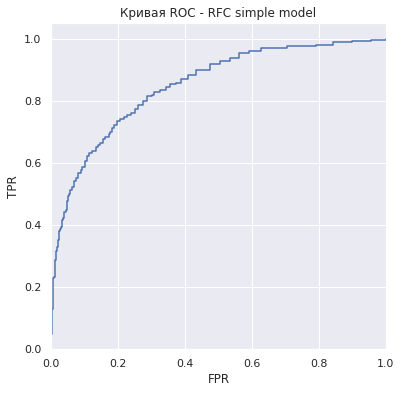

auc_roc = 0.8522937197738408


In [271]:
probabilities = model.predict_proba(X_test_scaled)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC - RFC simple model')
plt.show()
print('auc_roc =', auc_roc)

In [273]:
result['upsample'] = False
result.loc[4]=['model 2: simple model without params', 'gini',None,'auto', 10, 0.54, 0.66, 0.60, False, True]
result

,type,criterion,max_depth,max_features,n_estimator,recall,precision,f1,class_weight,upsample
1,model 1,entropy,21,auto,23,0.48,0.71,0.58,False,False
2,model 2: simple model without params,gini,None,auto,10,0.43,0.71,0.54,False,False
3,model 2: simple model without params,gini,None,auto,10,0.43,0.76,0.55,True,False
4,model 2: simple model without params,gini,None,auto,10,0.54,0.66,0.60,False,True


confusion_matrix
 [[1695  127]
 [ 206  245]]
recall_score 0.5432372505543237
precision_score 0.6586021505376344
f1_score 0.5953827460510328
Confusion matrix, without normalization
[[1734   88]
 [ 233  218]]


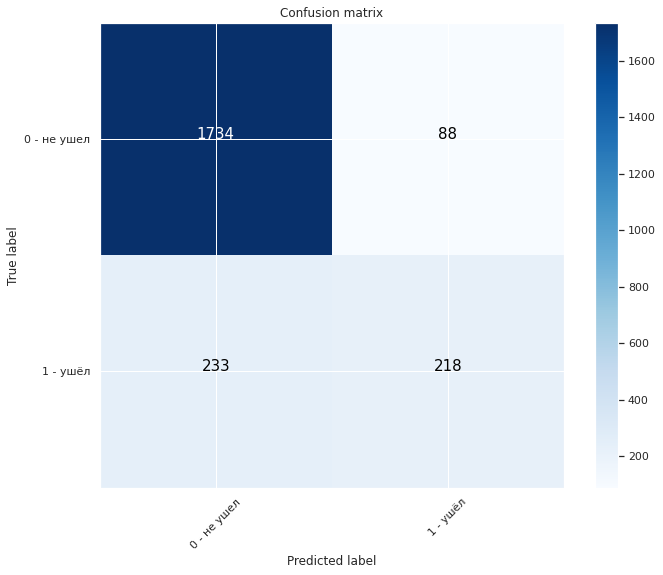

In [272]:
main_param(Y_test,model.predict(X_test_scaled))

#cnf_matrix = confusion_matrix(Y_test, model.predict(X_test_scaled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0 - не ушел', '1 - ушёл'], title='Confusion matrix')
plt.show()

### Downsample

Преобразование проходит в несколько этапов:

- Разделить обучающую выборку на отрицательные и положительные объекты;
- Случайным образом отбросить часть из отрицательных объектов;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.

In [274]:
fraction = round(Y_train[Y_train==1].count() / Y_train[Y_train==0].count(), 2)
fraction

0.26

In [275]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
[features_zeros.sample(frac=fraction/4, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
[target_zeros.sample(frac=fraction/4, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

best_f1 = {}
for i in np.arange(0.100,0.890,0.001):
    features_downsampled, target_downsampled = downsample(X_train_scaled, Y_train, fraction)
    model = RandomForestClassifier(random_state = 12345)
    model.fit(features_downsampled,target_downsampled)
    predicted_valid = model.predict(X_test_scaled)
    best_f1[fraction] = f1_score(Y_test, predicted_valid)

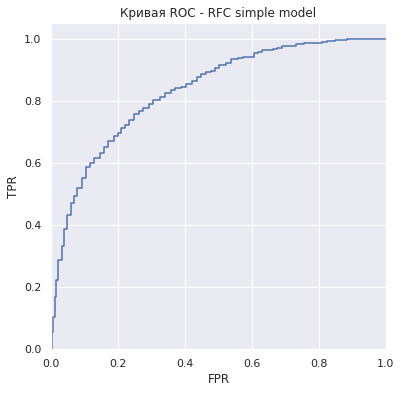

auc_roc = 0.837079328532034


In [276]:
probabilities = model.predict_proba(X_test_scaled)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC - RFC simple model')
plt.show()
print('auc_roc =', auc_roc)

In [277]:
max_key = max(best_f1, key=best_f1.get)
max_key

0.26

In [280]:
result['downsample'] = False
result.loc[5]=['model 2: simple model without params', 'gini',None,'auto', 10, 0.96, 0.27, 0.42, False, False, True]
result

,type,criterion,max_depth,max_features,n_estimator,recall,precision,f1,class_weight,upsample,downsample
1,model 1,entropy,21,auto,23,0.48,0.71,0.58,False,False,False
2,model 2: simple model without params,gini,None,auto,10,0.43,0.71,0.54,False,False,False
3,model 2: simple model without params,gini,None,auto,10,0.43,0.76,0.55,True,False,False
4,model 2: simple model without params,gini,None,auto,10,0.54,0.66,0.60,False,True,False
5,model 2: simple model without params,gini,None,auto,10,0.96,0.27,0.42,False,False,True


confusion_matrix
 [[ 645 1177]
 [  17  434]]
recall_score 0.9623059866962306
precision_score 0.26939788950962135
f1_score 0.42095053346265765
Confusion matrix, without normalization
[[ 645 1177]
 [  17  434]]


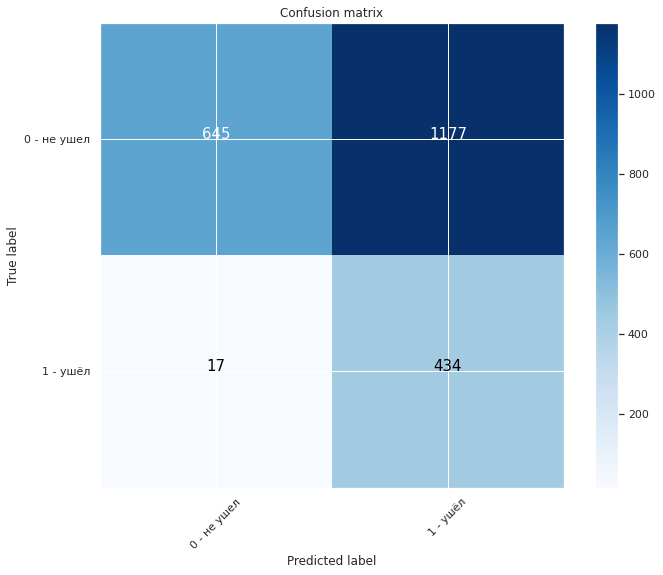

In [279]:
features_downsampled, target_downsampled = downsample(X_train_scaled, Y_train, max_key)
model = RandomForestClassifier(random_state = 12345)
model.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(X_test_scaled)
#f1_score(target_scaled_valid, predicted_valid)
main_param(Y_test,model.predict(X_test_scaled))
cnf_matrix = confusion_matrix(Y_test, predicted_valid)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0 - не ушел', '1 - ушёл'],title='Confusion matrix')
plt.show()

**Вывод**

Максимальное значение f1 получено при upsampling = 0.6. При использовании метода downsample было получено значение 0.42. Yаибольший прирост был при upsampling. Следующим шагом должен быть поиск оптимальных гиперпараметров.

### Подбор параметров модели по обновленому сету данных

Для простоты и скорости я буду использовать второй вариант и отказываться от кросс-валидации на уменьшенных и увеличенных выборках. Здесь мы проводим GridSearchCV только на исходной выборке, и затем используем лучшие параметры для моделей, обученных на увеличенной и уменьшенной выборках.

In [292]:
from imblearn.over_sampling import SMOTE

# Применяем метод SMOTE на обучающей выборке
smote = SMOTE(random_state=12345)
features_resampled, target_resampled = smote.fit_resample(features_upsampled, target_upsampled)

# Обучаем модель на полученных данных
rfc = RandomForestClassifier(class_weight='balanced', random_state=12345)
param_grid = {'n_estimators': range(1, 50, 2)\
              ,'max_features': ['auto']\
              ,'max_depth' : range(1, 50, 2)\
              ,'criterion' : ['gini', 'entropy']\
             }

In [293]:
%%time 
grid_cv = GridSearchCV(rfc, param_grid, scoring='f1', cv=5)

grid_cv.fit(features_resampled, target_resampled)
print('\nbest_params_ \n', grid_cv.best_params_)
print('\nbest_score \n', grid_cv.best_score_)


best_params_ 
 {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'n_estimators': 43}

best_score 
 0.9588909973136353
CPU times: user 36min 27s, sys: 9.15 s, total: 36min 36s
Wall time: 37min 1s


In [295]:
# Предсказываем значения для тестовой выборки
predictions = grid_cv.best_estimator_.predict(X_test_scaled)

# Выводим метрики
main_param(Y_test, predictions)

result=pd.DataFrame(columns = ['type','criterion', 'max_depth', 'max_features', 'n_estimator', 'recall', 'precision', 'f1'])
result.loc[1] = ['model 1','entropy',25,'auto', 43,round(recall_score(Y_test, predictions),2),round(precision_score(Y_test, predictions),2),round(f1_score(Y_test, predictions),2)]
result

confusion_matrix
 [[1685  137]
 [ 200  251]]
recall_score 0.5565410199556541
precision_score 0.6469072164948454
f1_score 0.5983313468414779


,type,criterion,max_depth,max_features,n_estimator,recall,precision,f1
1,model 1,entropy,25,auto,43,0.56,0.65,0.6


**Вывод**

Параметры найдены, требуется протестировать данную модель.

В отличии от предыдущей версии, вследствии правильного масштабирования результат модели изменился и мера f1 (upsampled) дала результат 0.6, что лучше предыдущих результатов. Количество деревьев возросло до 43, а глубина увеличилась и стала 25, критерий - gini. Такаим образом, данная модель показала наилучший результат. Влияние дисбаланса классов, очень сильно сказывалось на качестве модели.

## Тестирование модели

**Проверка**

По обновленному data set, по которому была произведена балансировка и получены гиперпараметры лучшей модели по метрике f1=0.95 сделаем модель и проверим её

confusion_matrix
 [[1691  131]
 [ 208  243]]
recall_score 0.5388026607538803
precision_score 0.6497326203208557
f1_score 0.5890909090909092
Confusion matrix, without normalization
[[1691  131]
 [ 208  243]]


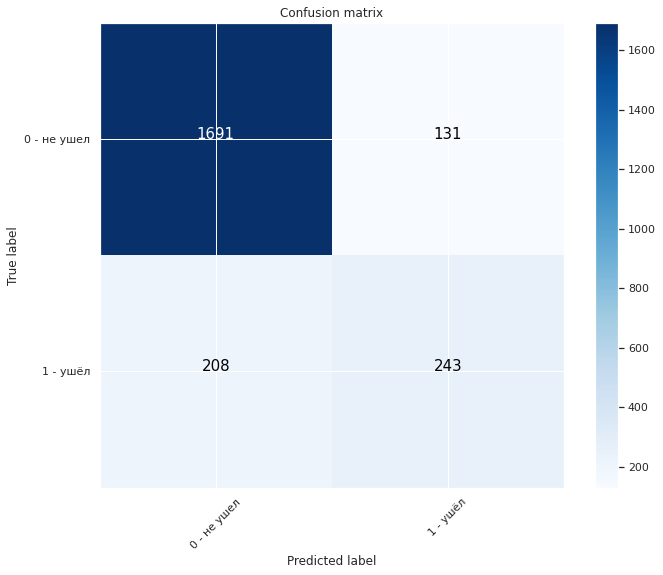

In [298]:
model = RandomForestClassifier(\
                               criterion='gini',\
                               max_depth=25,\
                               max_features='auto',\
                               n_estimators=43,\
                               #class_weight='balanced',\
                               random_state=12345\
                              )
model.fit(features_upsampled,target_upsampled)

predicted_valid = model.predict(X_test_scaled)

main_param(Y_test, predicted_valid)

cnf_matrix = confusion_matrix(Y_test, predicted_valid)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0 - не ушел', '1 - ушёл'],title='Confusion matrix')
plt.show()

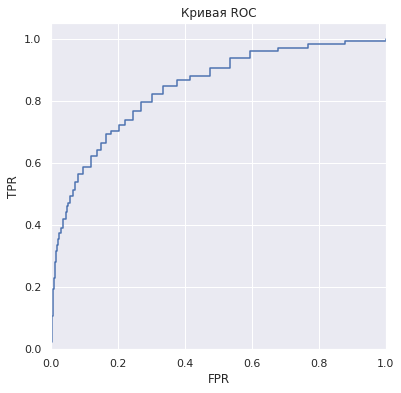

auc_roc = 0.8497691433355807


In [299]:
probabilities = model.predict_proba(X_test_scaled)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(Y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)
plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show()
print('auc_roc =', auc_roc)

**Вывод**

Метрика auc_roc больше случайной модели, что говорит о её адекватности и правильности.

# Общий итог

Была расмотрена структура RandomForestClassifier на основе которой были получены модели и наилучшие результаты показала модель найденая с помощью gridSearch('criterion': 'gini', 'max_depth': 21, 'max_features': 'auto', 'n_estimators': 43), но обученная на новом датасете, который был подвергнут upsample. Аналогичная методика балансировки методом downsample не дала значимого прироста по f1 мере.

Изначальный сет данных был преобразован и из него были убраны идентификаторы, числовые данные масштабированы, за исключением булевых признаков. Параметр "class_weight" не дал существенного резульатата модели. Итоговая модель имеет значение меры f1=0.6, что превышает пороговое значение текущего проекта. Метрика AUC-ROC также оказалась выше случайной модели, что показывает качество полученной модели. 